## Exam 1: HR Data Analysis
Load the core_dataset.csv file. The Excel workbook revolves around a fictitious company, called Dental Magic, and the core data set contains names, DOBs, age, gender, marital status, date of hire, reasons for termination, department, whether they are active or terminated, position title, pay rate, manager name, and performance score.

In [5]:
import pandas as pd
df = pd.read_csv('core_dataset.csv')
df.head()

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,...,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/1985,32.0,Female,Married,US Citizen,No,...,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/1984,33.0,Male,Divorced,US Citizen,No,...,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/1986,31.0,Male,Single,US Citizen,No,...,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/1985,32.0,Female,Married,US Citizen,No,...,2/16/2015,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/1988,29.0,Female,Single,US Citizen,No,...,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


Remove the following columns. They are not very important to our analysis. 'Employee Name', 'Employee Number', 'Date of Hire', 'Date of Termination', 'DOB'

In [6]:
df.drop(columns=['Employee Name', 'Employee Number', 'Date of Hire', 'Date of Termination', 'DOB'], inplace=True)
df.head()

,State,Zip,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
0,MA,1450.0,32.0,Female,Married,US Citizen,No,Black or African American,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,MA,1460.0,33.0,Male,Divorced,US Citizen,No,Black or African American,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,MA,2703.0,31.0,Male,Single,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,MA,2170.0,32.0,Female,Married,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,MA,2330.0,29.0,Female,Single,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


## Does Race Affect Pay?
Calculate the average pay rate grouped by the position and race

In [8]:
z = df.groupby(['Position', 'RaceDesc'])['Pay Rate'].mean()
z

Position                      RaceDesc                        
Accountant I                  Black or African American           25.750000
                              White                               29.000000
Administrative Assistant      Asian                               20.500000
                              White                               19.030000
Area Sales Manager            American Indian or Alaska Native    56.000000
                              Asian                               56.000000
                              Black or African American           55.000000
                              Two or more races                   55.083333
                              White                               55.318182
CIO                           White                               65.000000
Database Administrator        Asian                               41.375000
                              Black or African American           40.200000
                         

Make three plots that shows across all the positions
- histogram for the races with max avg pay per position (example: if you have a total of 5 unique positions and race Hispanic was the max in 3 of them and asian was max in one and white was max in 1, then the histogram should show hispanic with count of 3, asian with count of 1 and white with count of 1)
- histogram for the races with min avg pay per position
- the difference  between the max avg pay and the min avag pay for each position on a bar plot


Hint: There are many ways to solve this. one of them is using the grouped by frame you got earlier, form three lists, each answers one of the following questions
- which race has the max avg pay corresponding to each position
- which race has the max avg pay corresponding to each position
- the difference between the max avg pay and min avg pay corresponding to each position

In [9]:
z = z.reset_index()
P = z.Position.unique()
max_array = []
min_array = []
diff_array = []
for p in P:
    index_max_trip_time = z[z.Position==p]['Pay Rate'].values.argmax()
    max_array.append(z[z.Position==p].iloc[index_max_trip_time]['RaceDesc'])
    index_min_trip_time = z[z.Position==p]['Pay Rate'].values.argmin()
    min_array.append(z[z.Position==p].iloc[index_min_trip_time]['RaceDesc'])
    diff_array.append(z[z.Position==p].max()['Pay Rate']-z[z.Position==p].min()['Pay Rate'])

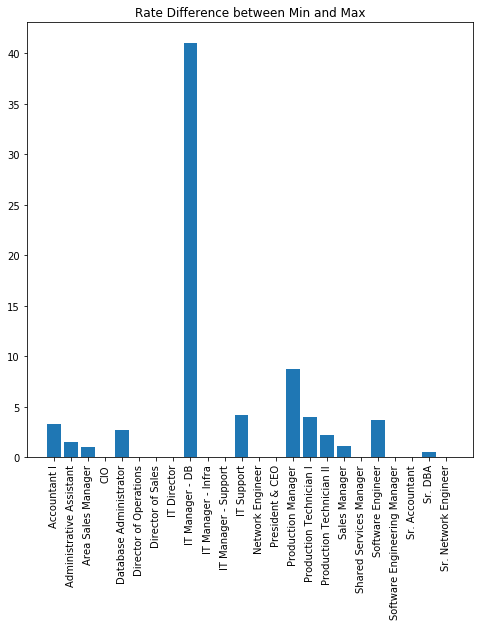

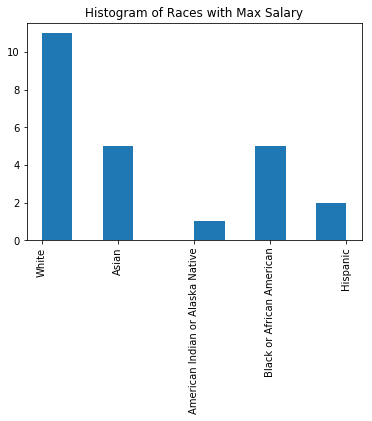

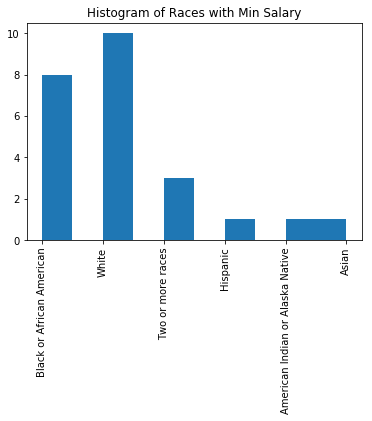

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[8,8])
plt.bar(P, diff_array)
plt.title('Rate Difference between Min and Max')
ss=plt.xticks(rotation='vertical')
plt.figure()
plt.hist(max_array)
plt.title('Histogram of Races with Max Salary')
ss=plt.xticks(rotation='vertical')
plt.figure()
plt.hist(min_array)
plt.title('Histogram of Races with Min Salary')
ss=plt.xticks(rotation='vertical')

## Does Gender Affect Pay?
repeat the same analysis but with gender. i.e., replace race with gender.

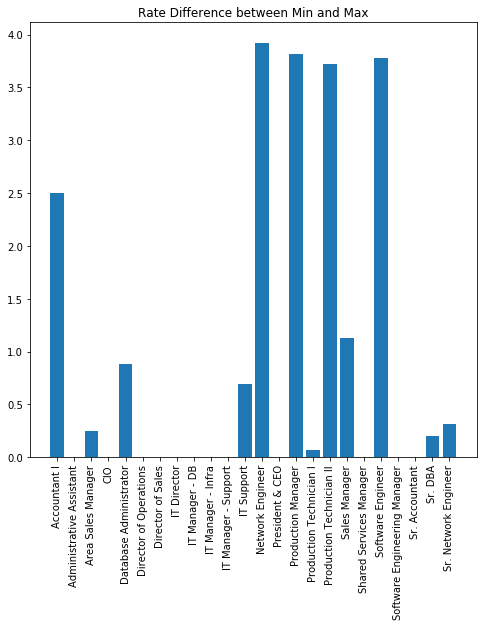

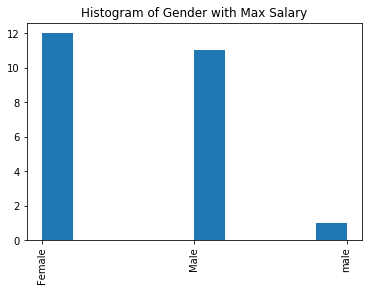

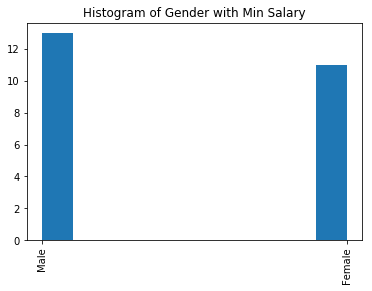

In [11]:
z = df.groupby(['Position', 'Sex'])['Pay Rate'].mean()
z = z.reset_index()
P = z.Position.unique()
max_array = []
min_array = []
diff_array = []
for p in P:
    index_max_trip_time = z[z.Position==p]['Pay Rate'].values.argmax()
    max_array.append(z[z.Position==p].iloc[index_max_trip_time]['Sex'])
    index_min_trip_time = z[z.Position==p]['Pay Rate'].values.argmin()
    min_array.append(z[z.Position==p].iloc[index_min_trip_time]['Sex'])
    diff_array.append(z[z.Position==p].max()['Pay Rate']-z[z.Position==p].min()['Pay Rate'])
plt.figure(figsize=[8,8])
plt.bar(P, diff_array)
plt.title('Rate Difference between Min and Max')
ss=plt.xticks(rotation='vertical')
plt.figure()
plt.hist(max_array)
plt.title('Histogram of Gender with Max Salary')
ss=plt.xticks(rotation='vertical')
plt.figure()
plt.hist(min_array)
plt.title('Histogram of Gender with Min Salary')
ss=plt.xticks(rotation='vertical')

# Predict Pay Rate using Linear Regression

convert needed features to categories and numbers instead of letters

In [35]:
col_to_convert = list(df.columns)
col_to_convert.remove('Age')
col_to_convert.remove('Pay Rate')
col_to_convert
for col in col_to_convert:
    df[col]=df[col].astype('category').cat.codes
df.head()

,State,Zip,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
0,11,4,32.0,1,2,3,1,3,3,1,1,1,28.50,4,4,4
1,11,5,33.0,2,1,3,1,3,3,1,1,1,23.00,4,21,4
2,11,120,31.0,2,4,3,1,6,3,1,1,1,29.00,4,8,4
3,11,87,32.0,1,2,3,1,6,3,1,1,2,21.50,4,16,5
4,11,99,29.0,1,4,3,1,6,3,1,1,2,16.56,4,21,5


Make sure your data does not have nans. You can drop any rows with nans

In [36]:
print(df.isna().sum())
df = df.dropna(axis = 0) 
df.isna().sum()

State                0
Zip                  0
Age                  1
Sex                  0
MaritalDesc          0
CitizenDesc          0
Hispanic/Latino      0
RaceDesc             0
Reason For Term      0
Employment Status    0
Department           0
Position             0
Pay Rate             1
Manager Name         0
Employee Source      0
Performance Score    0
dtype: int64


State                0
Zip                  0
Age                  0
Sex                  0
MaritalDesc          0
CitizenDesc          0
Hispanic/Latino      0
RaceDesc             0
Reason For Term      0
Employment Status    0
Department           0
Position             0
Pay Rate             0
Manager Name         0
Employee Source      0
Performance Score    0
dtype: int64

Split your data into 25% testing. Use random_state = 66. 

In [38]:
from sklearn.model_selection import train_test_split
X= df.loc[:, df.columns!='Pay Rate'] #otherwise the features will include Pay Rate
Y= df['Pay Rate']
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=66,test_size=.25)

Do any data preporcessing needed

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
x_train_scaled=scaler.transform(X_train)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int8, int16, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int8, int16, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


Fit your Linear regression model to predict the rates

In [40]:
model_scaled=LinearRegression()
model_scaled.fit(x_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Calculate the training and test MSE

Training MSE = 157.10707650331594
Test MSE = 260.69410505300675


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int8, int16, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


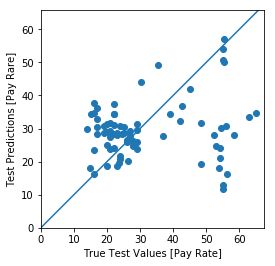

In [47]:
from sklearn.metrics import mean_squared_error
y_train_pred = model_scaled.predict(x_train_scaled)
y_test_pred = model_scaled.predict(scaler.transform(X_test))
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_test_pred, y_test)
print('Training MSE =', train_mse)
print('Test MSE =', test_mse)

# plot is optional
plt.scatter(y_test, y_test_pred)
plt.xlabel('True Test Values [Pay Rate]')
plt.ylabel('Test Predictions [Pay Rare]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])

Do a plot that shows the importance of each feature on predicting the rates

<BarContainer object of 15 artists>

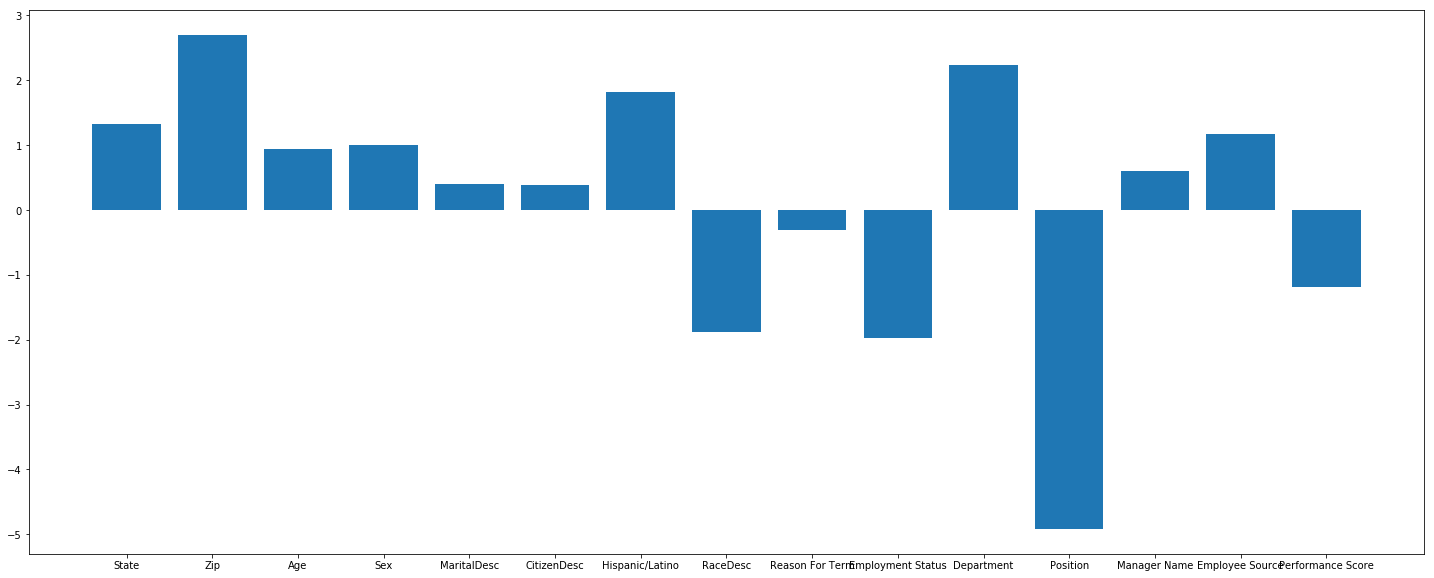

In [49]:
plt.figure(figsize=(25,10))
plt.bar(list(df.columns[df.columns != 'Pay Rate']),model_scaled.coef_)